In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score

import warnings
warnings.filterwarnings("ignore")

# Section 1
Original notes [here](https://princeton-introml.github.io/)

### 1.1 Linear Regression
Code from Section 1.4

In [3]:
# Prepare Data
X = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
y = [1, 1, 1, -1, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'X_train Size: {len(X_train)}')
print(f'X_test Size: {len(X_test)}')

X_train Size: 4
X_test Size: 1


In [4]:
# Linear Regression
linreg = LinearRegression().fit(X_train, y_train)
pred_train = linreg.predict(X_train)
pred_test = np.sign(linreg.predict(X_test))

In [5]:
y_train[:10]

[-1, -1, 1, 1]

In [6]:
pred_train[:10]

array([-0.6, -1.2,  1.2,  0.6])

In [7]:
# Train Results
print('Train MSE: ', '{0:.4f}'.format(mse(y_train, pred_train)))
print('Test MSE: ', '{0:.4f}'.format(mse(y_test, pred_test)))
print('Train Acc: ', '{0:.2f}'.format(100*(np.sign(pred_train)==y_train). mean()))
print('Test Acc: ', '{0:.2f}'.format(100*(np.sign(pred_test)==y_test).mean()))

Train MSE:  0.1000
Test MSE:  1.0000
Train Acc:  100.00
Test Acc:  0.00


Text(0.5, 1.0, 'y vs y hat')

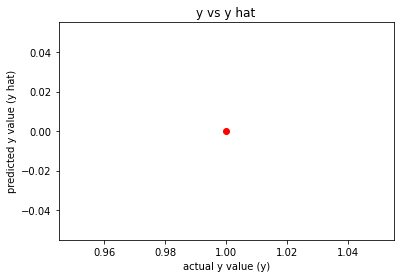

In [8]:
# Plot gold vs predicted value
plt.scatter(y_test, pred_test, c="red")
plt.xlabel("actual y value (y)")
plt.ylabel("predicted y value (y hat)")
plt.title("y vs y hat")

### SKLearn Linear Regression Example
[Link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [9]:
# Prepare Data
data = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2)

# Linear Regression
linreg = LinearRegression().fit(X_train, y_train)
pred_test = linreg.predict(X_test)

In [10]:
# Statistics
print("Learned Coefficients: \n", linreg.coef_)
print("Mean squared error: %.2f" % mse(y_test, pred_test))
print("Coefficient of Determination: %.2f" % r2_score(y_test, pred_test))

Learned Coefficients: 
 [ -15.74813852 -265.82512712  489.79278989  314.53422099 -715.90067903
  433.68697948   51.75374649  102.00138631  738.15310433   92.17761632]
Mean squared error: 2672.45
Coefficient of Determination: 0.56


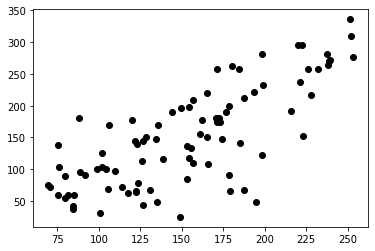

In [11]:
# Plot outputs
plt.scatter(pred_test, y_test, color="black")
plt.xticks()
plt.yticks()
plt.show()

### 3.4 Gradient Descent
Code from Section 3.4

In [12]:
# Initialize Variables
num_iter = 50
x = np.zeros(num_iter + 1)
y = np.zeros(num_iter + 1)
x[0], y[0], eta = 7.5, 10, 0.1

# Define functions to calculate
# * f = x^2 + y^2 
# * grad_f w.r.t. x and y
def f(x, y):
    f = x**2 + y**2
    return f

def grad_f(x, y):
    dx = 2*x
    dy = 2*y
    grad_f = (dx, dy)
    return grad_f

# Run Gradient Descent
for i in range(num_iter):
    grad_x, grad_y = grad_f(x[i], y[i])
    x[i + 1] = x[i] - eta * grad_x
    y[i + 1] = y[i] - eta * grad_y

In [13]:
# Create visualization of the function `f`
xmin, xmax, ymin, ymax, n = -5, 5, -5, 5, 10
X, Y = np.meshgrid(np.linspace(xmin, xmax, n), np.linspace(ymin, ymax, n))
Z = f(X, Y)

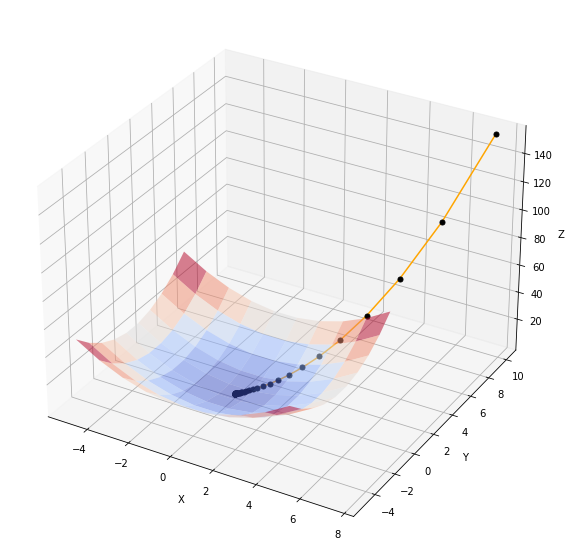

In [14]:
# Plot the function `f`
ax = plt.figure(figsize=(12, 10)).gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=ax.elev, azim=ax.azim)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)

# plot the trajectory of Gradient Descent
ax.plot(x, y, f(x, y), color='orange', markerfacecolor='black', markeredgecolor='k', marker='o', markersize=5);

### 4.2.3 Logistic Regression for Roommate Matching
Python implementation of Roommate Matching toy example in Section 4.2.3

In [39]:
# X: (bias term, sleep score, music score)
# y: (compatibility score)
X = [
    [1, 1, 0.5],
    [1, 0.75, 1],
    [1, 0.25, 0],
    [1, 0, 1]
]
y = [1, 1, -1, -1]
data = list(zip(X, y))

model_1 = (0, 1, 0) # Only sleep score
model_2 = (0, 0, 1) # Only music score

def sigmoid(w, x):
    return 1. / (1 + np.exp(-1 * np.dot(w, x)))

In [40]:
# Likelihood of observations (YYNN) according to...
like_1 = np.prod([sigmoid(model_1, x) if y==1 else 1-sigmoid(model_1, x) for x, y in data]) # Model 1
like_2 = np.prod([sigmoid(model_2, x) if y==1 else 1-sigmoid(model_2, x) for x, y in data]) # Model 2
print("Model 1 Likelihood:", np.round(like_1, 2))
print("Model 2 Likelihood:", np.round(like_2, 2))

Model 1 Likelihood: 0.11
Model 2 Likelihood: 0.06


### 4.3.1 SVM for Roommate Matching

In [60]:
model_3 = [-1.5, 3, 0] # Soft Margin SVM

def hinge(w, x, y):
    return np.max([0., 1 - y*np.dot(w, x)])

# SVM Losses
print("SVM Losses at...")
print("[1, 0.5]: %3.2f"  % (hinge(model_3, (1, 1, 0.5),   1)))
print("[1, 0]: %3.2f"    % (hinge(model_3, (1, 0, 1),    -1)))
print("[0.75, 1]: %3.2f" % (hinge(model_3, (1, 0.75, 1),  1)))
print("[0.25, 0]: %3.2f" % (hinge(model_3, (1, 0.25, 0), -1)))

SVM Losses at...
[1, 0.5]: 0.00
[1, 0]: 0.00
[0.75, 1]: 0.25
[0.25, 0]: 0.25


### Linear Classification in Programming

In [106]:
np.random.seed(23)

# X: array of shape (n, d), each row is a d-dimensional data point
# y: array of shape (n), each value = -1 or +1
# w: array of shape (d), each value is a weight for each dimension

n, d, eta = 50, 3, 0.05
X = np.random.randint(-5, 5, (n,d))
y = np.random.choice([-1, 1], (n,))
w = np.random.random((d,))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Implement loss, grad_loss, and gradient_descent for Logistic Loss

def loss(X, y, w):
    return np.sum(np.log(1+np.exp(-1*y*np.dot(w,X))))

def grad_loss(X, y, w):
    return np.sum(-y*X) / (1+np.exp(y*np.dot(w,X)))

def gradient_descent(X, y, w0, eta):
    for X_, y_ in list(zip(X, y)):
        w0 = w0 - eta*grad_loss(X_, y_, w0)
    return w0

In [107]:
# Run Gradient Descent
w = gradient_descent(X_train, y_train, w, eta)

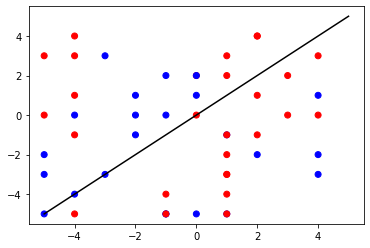

In [108]:
# Plot the learned classifier
colors = {1: 'blue', -1: 'red'}
xmin, xmax, ymin, ymax = -5, 5, -5, 5
plt.scatter(X[:,0], X[:,1], c=np.array([colors[y_i] for y_i in y]))
plt.plot([xmin, xmax], [ymin, ymax], c='black');